# Comparing SVD, t-SNE, PCA, LLE, Isomap and Autoencoder 
 using PySpark

## Sample Data

In [8]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples and features
n_samples = 10_000
n_features = 15

# Create features with different distributions
# Binomial
feature_1 = np.random.binomial(n=10, p=0.5, size=n_samples)
feature_2 = np.random.binomial(n=20, p=0.3, size=n_samples)

# Normal
feature_3 = np.random.normal(loc=0, scale=1, size=n_samples)
feature_4 = np.random.normal(loc=5, scale=2, size=n_samples)
feature_5 = np.random.normal(loc=10, scale=5, size=n_samples)

# Exponential
feature_6 = np.random.exponential(scale=1, size=n_samples)
feature_7 = np.random.exponential(scale=2, size=n_samples)

# Poisson
feature_8 = np.random.poisson(lam=3, size=n_samples)

# Uniform
feature_9 = np.random.uniform(low=0, high=1, size=n_samples)
feature_10 = np.random.uniform(low=10, high=20, size=n_samples)

# Create a dataframe
data = pd.DataFrame({
    'feature_1': feature_1,
    'feature_2': feature_2,
    'feature_3': feature_3,
    'feature_4': feature_4,
    'feature_5': feature_5,
    'feature_6': feature_6,
    'feature_7': feature_7,
    'feature_8': feature_8,
    'feature_9': feature_9,
    'feature_10': feature_10
})

# Add more features with similar or different distributions as needed
for i in range(11, n_features + 1):
    data[f'feature_{i}'] = np.random.normal(loc=0, scale=1, size=n_samples)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


StatementMeta(, 7cef5b84-65e1-44c1-85cb-3995c5c37bbc, 10, Finished, Available, Finished)

In [9]:
data_scaled

StatementMeta(, 7cef5b84-65e1-44c1-85cb-3995c5c37bbc, 11, Finished, Available, Finished)

array([[-0.61652753, -0.50118167, -0.81589619, ..., -2.28654248,
         1.1958988 , -2.17154573],
       [ 1.93005459, -0.50118167,  0.58909424, ..., -0.85585203,
         2.08128419, -0.78612299],
       [ 0.65676353, -0.98518135,  1.3172583 , ..., -0.97339038,
         0.05739102, -0.50817108],
       ...,
       [ 1.93005459, -0.50118167,  1.09669767, ...,  1.37242693,
         0.58121493,  1.06438603],
       [ 0.020118  , -0.01718199,  1.97002415, ...,  0.18566548,
        -0.62027363,  0.62883075],
       [-0.61652753, -0.98518135,  0.2207609 , ..., -0.58219085,
        -0.16905136,  0.08574536]])

### PCA

In [10]:
from sklearn.decomposition import PCA
start_time = time.time()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

pca_time = time.time() - start_time
print(f"PCA took {pca_time:.2f} seconds")

StatementMeta(, 7cef5b84-65e1-44c1-85cb-3995c5c37bbc, 12, Finished, Available, Finished)

2024-09-27:17:32:20,491 WARNING  [tracking_store.py:153] log_inputs not supported


PCA took 10.94 seconds


### SVD

In [11]:
from sklearn.decomposition import TruncatedSVD
start_time = time.time()

svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(data_scaled)

svd_time = time.time() - start_time
print(f"SVD took {svd_time:.2f} seconds")


StatementMeta(, 7cef5b84-65e1-44c1-85cb-3995c5c37bbc, 13, Finished, Available, Finished)

2024-09-27:17:32:33,232 WARNING  [tracking_store.py:153] log_inputs not supported


SVD took 9.78 seconds


### t-SNE (t-distributed Stohastic Neighbour Embedding)

In [12]:
from sklearn.manifold import TSNE
start_time = time.time()

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_result = tsne.fit_transform(data_scaled)

tsne_time = time.time() - start_time
print(f"t-SNE took {tsne_time:.2f} seconds")


StatementMeta(, 7cef5b84-65e1-44c1-85cb-3995c5c37bbc, 14, Finished, Available, Finished)

2024-09-27:17:32:44,223 WARNING  [tracking_store.py:153] log_inputs not supported


t-SNE took 137.38 seconds


### LLE (Locally Linear Embeddings)

In [13]:
from sklearn.manifold import LocallyLinearEmbedding
start_time = time.time()

lle = LocallyLinearEmbedding(n_components=2, random_state=42, n_jobs=-1)
lle_result = lle.fit_transform(data_scaled)

lle_time = time.time() - start_time
print(f"LLE took {lle_time:.2f} seconds")


StatementMeta(, 7cef5b84-65e1-44c1-85cb-3995c5c37bbc, 15, Finished, Available, Finished)

2024-09-27:17:35:03,247 WARNING  [tracking_store.py:153] log_inputs not supported


LLE took 977.83 seconds


### Isomap

In [14]:
from sklearn.manifold import Isomap
start_time = time.time()

isomap = Isomap(n_components=2, n_jobs=-1)
isomap_result = isomap.fit_transform(data_scaled)

isomap_time = time.time() - start_time
print(f"Isomap took {isomap_time:.2f} seconds")


StatementMeta(, 7cef5b84-65e1-44c1-85cb-3995c5c37bbc, 16, Finished, Available, Finished)

2024-09-27:17:51:26,354 WARNING  [tracking_store.py:153] log_inputs not supported


Isomap took 182.75 seconds


### Autoencoder (with keras)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test = train_test_split(data_scaled, test_size=0.1, random_state=42)

# Define Autoencoder model
autoencoder = Sequential([
    Dense(64, activation='relu', input_shape=(n_features,)),
    Dense(32, activation='relu'),
    Dense(2, activation='relu'),  # Bottleneck layer (reduced dimension)
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(n_features, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
start_time = time.time()

autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, verbose=1)

autoencoder_time = time.time() - start_time
encoded_data = autoencoder.predict(data_scaled)

print(f"Autoencoder took {autoencoder_time:.2f} seconds")


StatementMeta(, 7cef5b84-65e1-44c1-85cb-3995c5c37bbc, 17, Finished, Available, Finished)

2024-09-27 17:54:33.301809: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-27 17:54:35.309916: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-27:17:54:49,755 WARNING  [tracking_store.py:153] log_inputs not supported


Epoch 1/10
36/36 [==============================] - 4s 44ms/step - loss: 1.1849
Epoch 2/10
36/36 [==============================] - 0s 4ms/step - loss: 1.0073
Epoch 3/10
36/36 [==============================] - 0s 4ms/step - loss: 0.9726
Epoch 4/10
36/36 [==============================] - 0s 3ms/step - loss: 0.9578
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 0.9433
Epoch 6/10
36/36 [==============================] - 0s 3ms/step - loss: 0.9355
Epoch 7/10
36/36 [==============================] - 0s 3ms/step - loss: 0.9311
Epoch 8/10
36/36 [==============

313/313 [==============================] - 1s 2ms/step
Autoencoder took 30.96 seconds


### Combine and visualize

With final comparison

StatementMeta(, 7cef5b84-65e1-44c1-85cb-3995c5c37bbc, 18, Finished, Available, Finished)

/tmp/ipykernel_6097/2726123212.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(results[:, 0], results[:, 1], s=5, cmap='viridis')


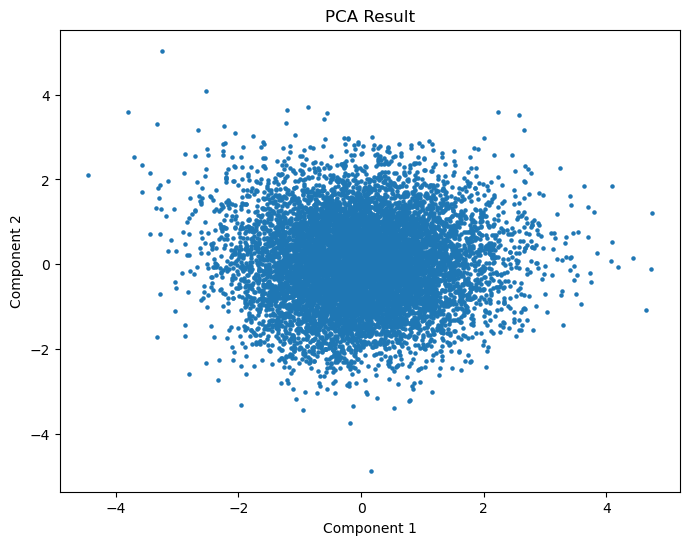

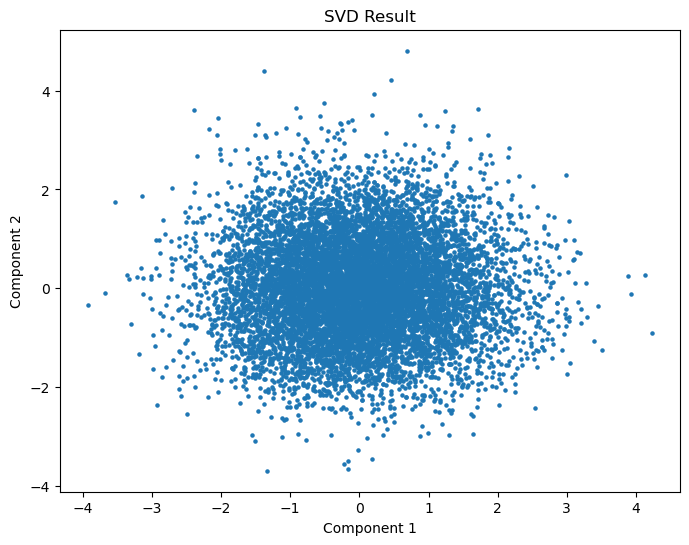

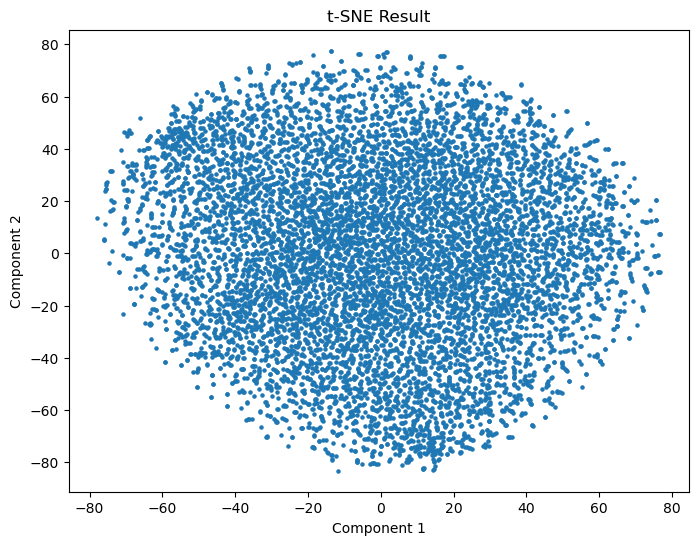

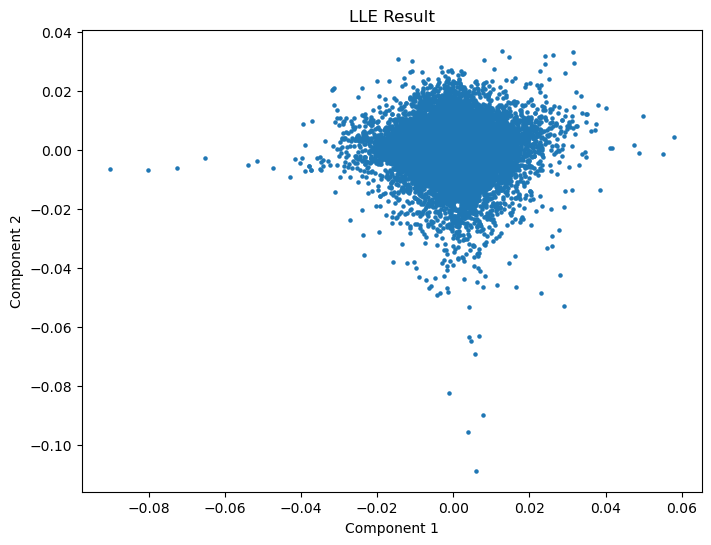

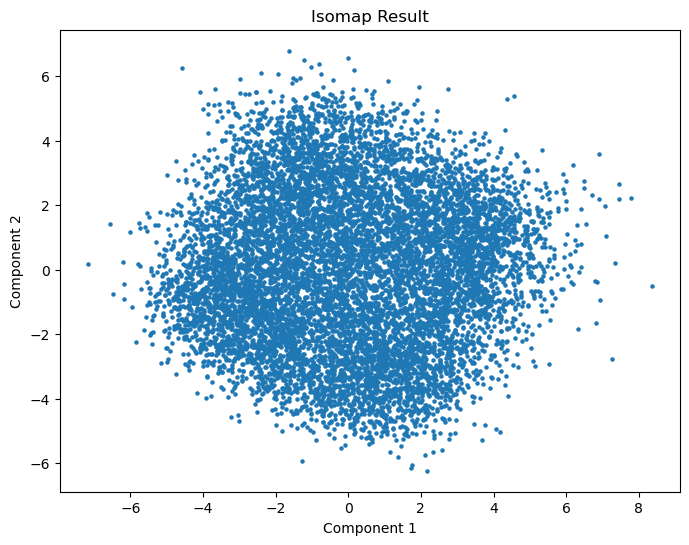

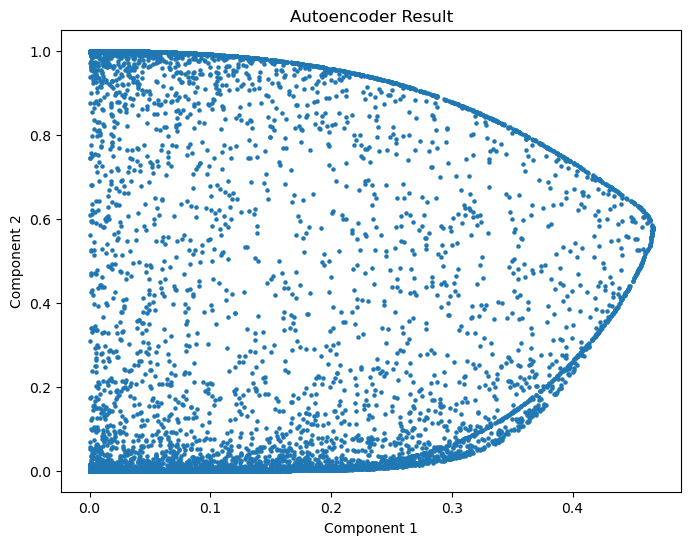

In [16]:
def plot_reduction(results, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(results[:, 0], results[:, 1], s=5, cmap='viridis')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# Plot results for each method
plot_reduction(pca_result, 'PCA Result')
plot_reduction(svd_result, 'SVD Result')
plot_reduction(tsne_result, 't-SNE Result')
plot_reduction(lle_result, 'LLE Result')
plot_reduction(isomap_result, 'Isomap Result')
plot_reduction(encoded_data, 'Autoencoder Result')
